In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [28]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")
data.head(3)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0


In [9]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

## Trend of Heart Attack Risk with Physical Activity Days Per Week

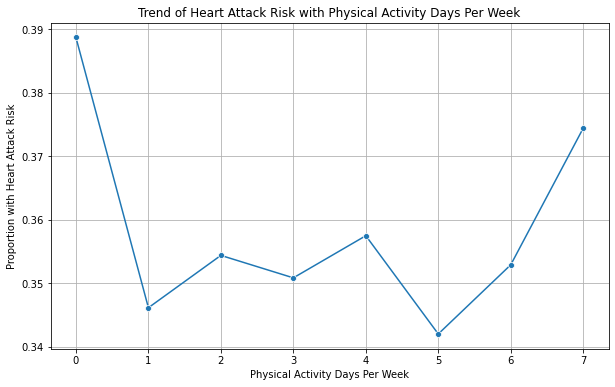

In [45]:
data_for_activity_days = data.groupby('Physical Activity Days Per Week')['Heart Attack Risk'].mean().reset_index()

# Plot
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Physical Activity Days Per Week', y = 'Heart Attack Risk', \
             data = data_for_activity_days, marker = 'o')
plt.title('Trend of Heart Attack Risk with Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Proportion with Heart Attack Risk')
plt.grid(True)
plt.show()

## Trend of Heart Attack Risk with Stress Level

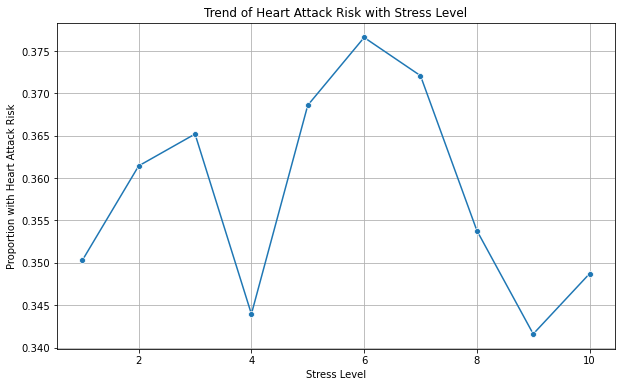

In [48]:
data_for_stress = data.groupby('Stress Level')['Heart Attack Risk'].mean().reset_index()

# Plot
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Stress Level', y = 'Heart Attack Risk', data = data_for_stress, marker = 'o')
plt.title('Trend of Heart Attack Risk with Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Proportion with Heart Attack Risk')
plt.grid(True)
plt.show()

## Exercise Hours Per Week Distritbution by Heart Attack Risk

Text(0.5, 1.0, 'Exercise Hours Per Week by Heart Attack Risk')

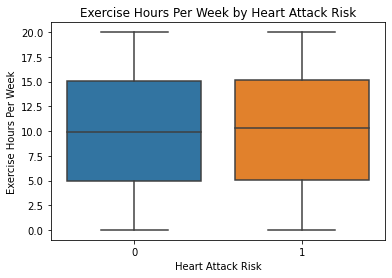

In [52]:
sns.boxplot(x = 'Heart Attack Risk', y = 'Exercise Hours Per Week', data = data)
plt.title('Exercise Hours Per Week by Heart Attack Risk')

## Sedentary Hours Per Day Distribution by Heart Attack Risk


Text(0.5, 1.0, 'Sedentary Hours Per Day Distribution by Heart Attack Risk')

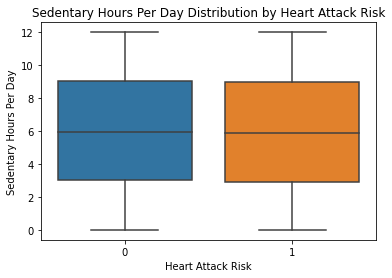

In [51]:
sns.boxplot(x = 'Heart Attack Risk', y = 'Sedentary Hours Per Day', data = data)
plt.title('Sedentary Hours Per Day Distribution by Heart Attack Risk')

## Heart Attack Risk by Family History

Text(0.5, 1.0, 'Heart Attack Risk by Family History')

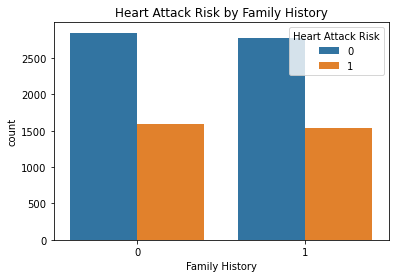

In [39]:
sns.countplot(x = 'Family History', hue = 'Heart Attack Risk', data = data)
plt.title('Heart Attack Risk by Family History')

## Heart Attack Risk by Alcohol Consumption

Text(0.5, 1.0, 'Heart Attack Risk by Alcohol Consumption')

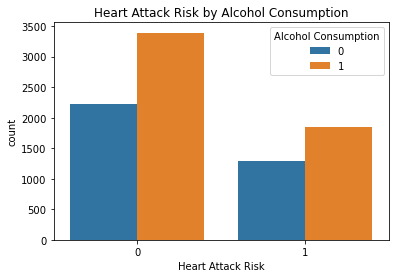

In [53]:
sns.countplot(x = 'Heart Attack Risk', hue = 'Alcohol Consumption', data = data)
plt.title('Heart Attack Risk by Alcohol Consumption')

In [59]:
# Filter the dataset for individuals who have had a heart attack
heart_attack_df = data[data['Heart Attack Risk'] == 1]

# Calculate the percentage of these individuals who consume alcohol
percentage_alcohol_consumption = (heart_attack_df['Alcohol Consumption'].sum() / len(heart_attack_df)) * 100

print(f"Percentage of heart attack patients who consume alcohol: {percentage_alcohol_consumption:.2f}%")

Percentage of heart attack patients who consume alcohol: 58.90%


In [61]:
# Filter the dataset for individuals who have had a heart attack
heart_attack_df = data[data['Heart Attack Risk'] == 0]

# Calculate the percentage of these individuals who consume alcohol
percentage_alcohol_consumption = (heart_attack_df['Alcohol Consumption'].sum() / len(heart_attack_df)) * 100

print(f"Percentage of non-heart attack patients who consume alcohol: {percentage_alcohol_consumption:.2f}%")

Percentage of non-heart attack patients who consume alcohol: 60.31%


## Heart Attack Risk by Smoking

Text(0.5, 1.0, 'Heart Attack Risk by Smoking')

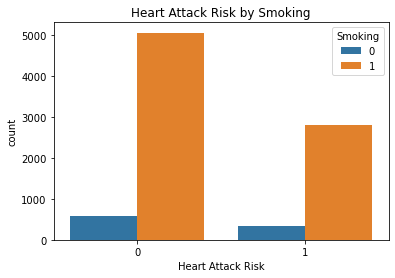

In [55]:
sns.countplot(x = 'Heart Attack Risk', hue = 'Smoking', data = data)
plt.title('Heart Attack Risk by Smoking')

## How the Distribution of Cholesterol Levels Varies by Sex or Diabetes Status

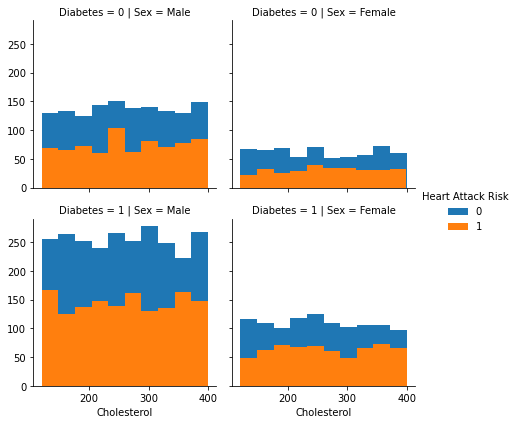

In [42]:
g = sns.FacetGrid(data, col = "Sex", row = "Diabetes", hue = "Heart Attack Risk")
g = g.map(plt.hist, 'Cholesterol').add_legend()

## Distribution of Heart Attack by Sex and Age

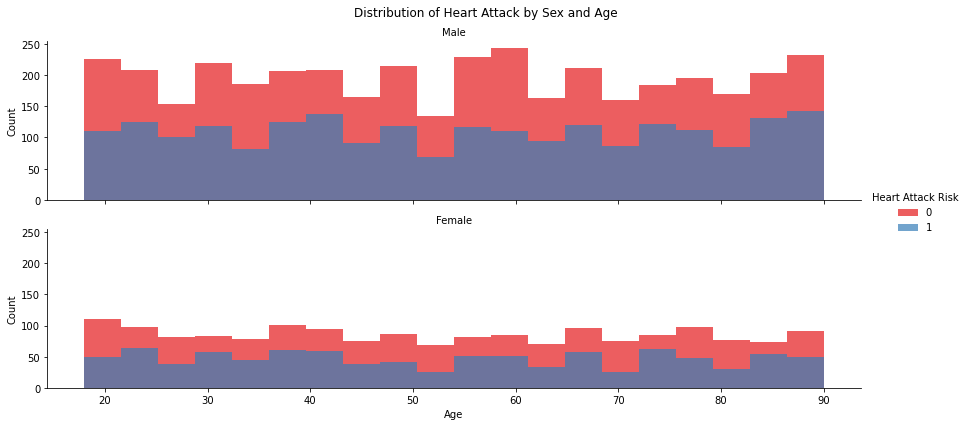

In [44]:
g = sns.FacetGrid(data, row = 'Sex', hue = 'Heart Attack Risk', aspect = 4, palette = 'Set1')
g = g.map(plt.hist, 'Age', bins = 20, alpha = 0.7)

g.add_legend(title = 'Heart Attack Risk')
g.set_titles("{row_name}")
g.set_axis_labels("Age", "Count")
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Distribution of Heart Attack by Sex and Age')

plt.show()

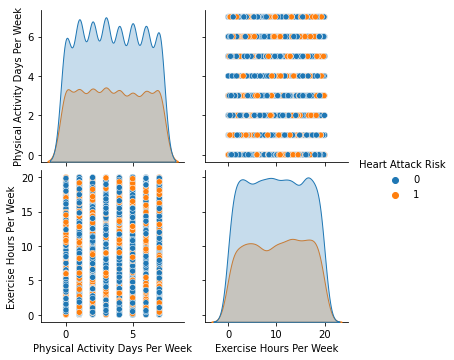

In [47]:
sns.pairplot(data, vars = ['Physical Activity Days Per Week', 'Exercise Hours Per Week'], \
             hue = 'Heart Attack Risk')
plt.show()

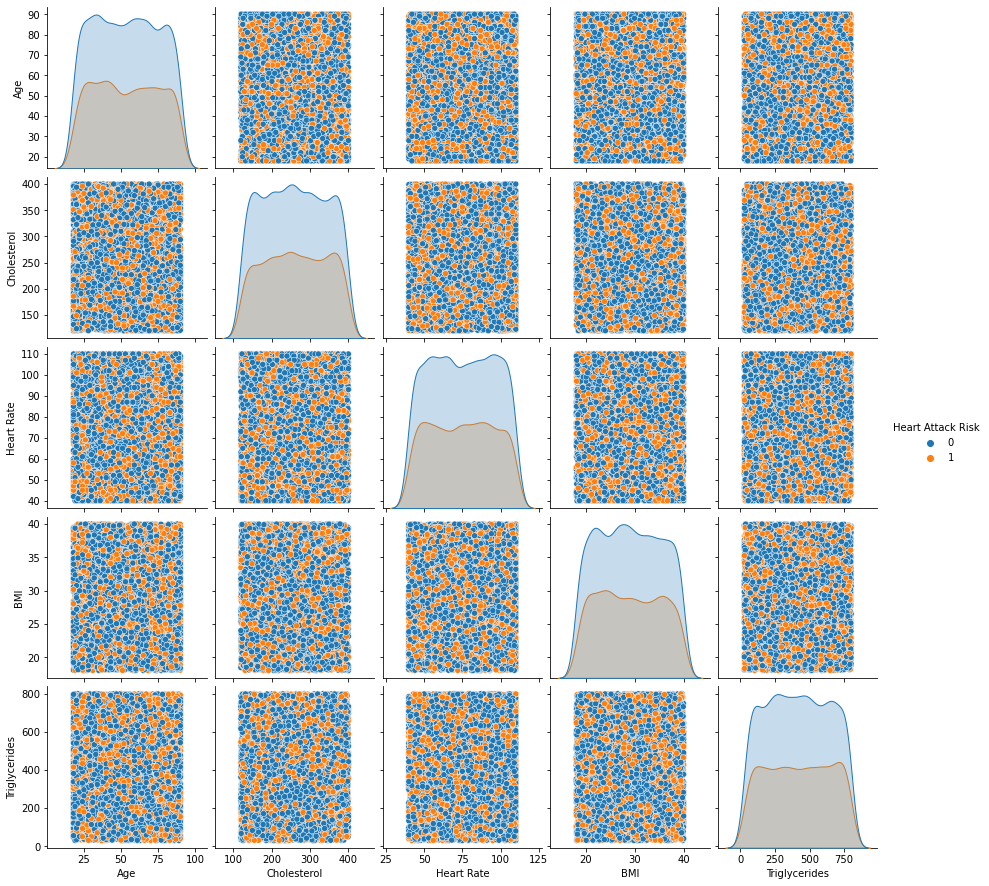

In [16]:
numerical_subset = data[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'BMI', 'Triglycerides', 'Heart Attack Risk']]
sns.pairplot(numerical_subset, hue = 'Heart Attack Risk')

## Feature Engineering

In [29]:
# Encoding categorical variables using OneHotEncoder
categorical_cols = ['Sex', 'Continent', 'Hemisphere']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoded_feature_names)

# Extracting systolic and diastolic blood pressure from 'Blood Pressure' column
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop all unnecessary columns from the dataset
data = data.drop(categorical_cols + ['Blood Pressure', 'Patient ID'], axis=1)

# Merging the encoded categorical features and the transformed/created features back into the dataset
data_transformed = pd.concat([data, encoded_df], axis=1)
data_transformed.head()

/Users/cathy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sex_Female,Sex_Male,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67,208,72,0,0,1,0,0,4.168189,Average,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,383,73,1,1,1,0,1,9.828130,Average,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Assuming 'data_transformed' is the current dataset
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides', 'Systolic BP', 'Diastolic BP']

scaler = StandardScaler()
data_transformed[numerical_features] = scaler.fit_transform(data_transformed[numerical_features])
data_transformed

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sex_Female,Sex_Male,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,0.625557,-0.641579,-0.147042,0,0,1,0,0,4.168189,Average,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.539322,1.596895,1.118179,1,1,1,1,1,1.813242,Unhealthy,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.539322,0.793023,-0.147042,1,0,0,0,0,2.078353,Healthy,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.425621,1.522691,-0.098380,1,1,1,0,1,9.828130,Average,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.578495,0.718820,0.874867,1,1,1,1,0,5.804299,Unhealthy,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,-1.717530,-0.682328,1,1,1,0,1,7.917342,Healthy,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8759,-1.209884,-1.729898,-0.098380,1,0,0,1,0,16.558426,Healthy,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8760,-0.315695,-0.122154,1.458815,0,1,1,1,1,3.148438,Average,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8761,-0.833383,-1.012597,-0.730990,1,0,1,0,0,3.789950,Unhealthy,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [32]:
# Selecting a subset of features for polynomial feature creation
selected_features = ['Age', 'BMI', 'Systolic BP', 'Diastolic BP']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_transformed[selected_features])
poly_feature_names = poly.get_feature_names_out(selected_features)

# Adding polynomial features to the dataset
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
data_transformed = pd.concat([data_transformed.drop(selected_features, axis=1), poly_df], axis=1)
data_transformed.head()

,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,...,Age^2,Age BMI,Age Systolic BP,Age Diastolic BP,BMI^2,BMI Systolic BP,BMI Diastolic BP,Systolic BP^2,Systolic BP Diastolic BP,Diastolic BP^2
0,-0.641579,-0.147042,0,0,1,0,0,4.168189,Average,0,...,0.391322,0.233617,0.544262,0.121222,0.139468,0.324921,0.072369,0.756977,0.168599,0.037551
1,1.596895,1.118179,1,1,1,1,1,1.813242,Unhealthy,1,...,2.369513,0.413276,-1.748231,-0.822738,0.072081,-0.304916,-0.143497,1.289847,0.607017,0.285669
2,0.793023,-0.147042,1,0,0,0,0,2.078353,Healthy,1,...,2.369513,0.174150,-2.274026,-1.452072,0.012799,-0.167132,-0.106722,2.182386,1.393556,0.889850
3,1.522691,-0.098380,1,1,1,0,1,9.828130,Average,1,...,2.032396,1.708641,1.510886,1.441957,1.436460,1.270206,1.212257,1.123194,1.071953,1.023048
4,0.718820,0.874867,1,1,1,1,0,5.804299,Unhealthy,1,...,0.334656,-0.648392,-0.967704,0.112102,1.256252,1.874916,-0.217196,2.798251,-0.324158,0.037551
